# EDA

Time to really take a good look at the data!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as cplt

c1 = '#6DB1BF' # cyan
c2 = '#315659' # blue
c3 = '#F98948' # orange
c4 = '#C0DA74' # green
c5 = '#859750' # dark green

data = pd.read_csv('OnlineNewsPopularity_Clean.csv').set_index('url')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39468 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                39468 non-null  float64
 1   n_tokens_content              39468 non-null  float64
 2   n_unique_tokens               39468 non-null  float64
 3   n_non_stop_words              39468 non-null  float64
 4   n_non_stop_unique_tokens      39468 non-null  float64
 5   num_hrefs                     39468 non-null  float64
 6   num_self_hrefs                39468 non-null  float64
 7   num_imgs                      39468 non-null  float64
 8   num_videos                    39468 non-null  float64
 9   average_token_length          39468 non-null  float64
 10  num_keywords                  39468 non-null  float64
 11  self_reference_mi

In [2]:
data.sort_values('shares',ascending=False).head(5)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,kw_min_avg,kw_min_max,kw_avg,kw_avg_min,kw_avg_avg,kw_avg_max,kw_max,kw_max_min,kw_max_avg,kw_max_max
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,12.0,688.0,0.500734,1.0,0.643357,28.0,3.0,15.0,1.0,4.893895,...,3427,843300,iphone,43,4330,843300,iphone rumors,568,97434,843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,11.0,893.0,0.517202,1.0,0.716730,17.0,11.0,0.0,11.0,4.586786,...,3431,690400,marketing,76,3789,690400,dove,544,49936,690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,13.0,2591.0,0.237708,1.0,0.371091,27.0,4.0,1.0,1.0,4.588962,...,3431,690400,jobs,144,4457,663600,the first 100,642,64524,663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,9.0,134.0,0.689394,1.0,0.851852,1.0,1.0,0.0,2.0,4.082090,...,3267,652900,creativity,596,40771,652900,yeezus,213,66531,652900
http://mashable.com/2013/03/02/wealth-inequality/,11.0,382.0,0.487805,1.0,0.605809,15.0,3.0,11.0,1.0,4.777487,...,3354,617900,videos,5,3666,617900,conversations,36,4365,690400


# Summary Statistics

In [3]:
data.describe().T.drop(columns='count').round(3)

,mean,std,min,25%,50%,75%,max
n_tokens_title,10.396,2.113,2.000,9.000,10.000,12.000,23.000
n_tokens_content,546.398,471.047,0.000,246.000,409.000,716.000,8474.000
n_unique_tokens,0.548,3.529,0.000,0.471,0.539,0.609,701.000
n_non_stop_words,0.997,5.243,0.000,1.000,1.000,1.000,1042.000
n_non_stop_unique_tokens,0.689,3.272,0.000,0.626,0.690,0.755,650.000
num_hrefs,10.883,11.309,0.000,4.000,8.000,14.000,304.000
num_self_hrefs,3.297,3.860,0.000,1.000,3.000,4.000,116.000
num_imgs,4.547,8.317,0.000,1.000,1.000,4.000,128.000
num_videos,1.253,4.116,0.000,0.000,0.000,1.000,91.000
average_token_length,4.548,0.844,0.000,4.478,4.664,4.855,8.042


# Distribution of the Shares

Mean Shares:   3392
Median Shares: 1400


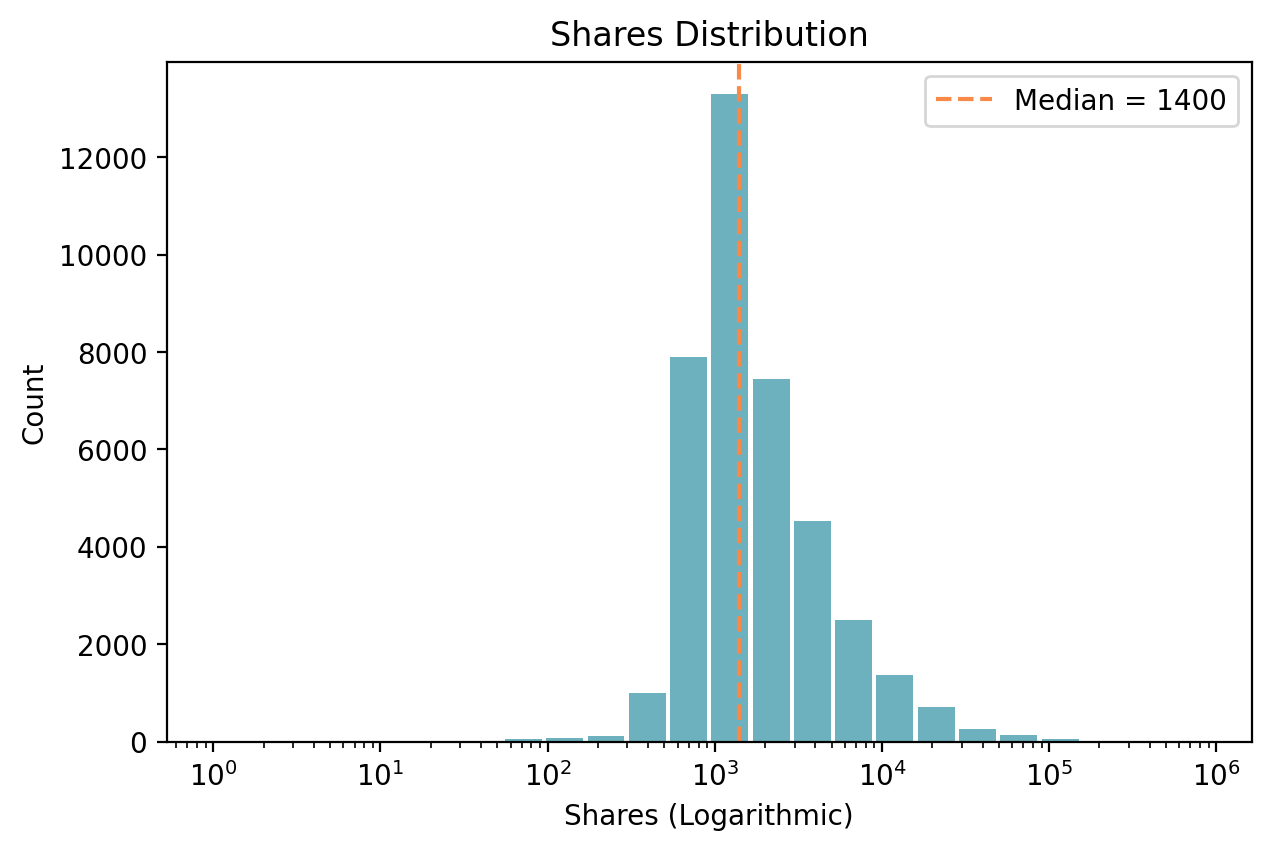

In [4]:
plt.figure(figsize=(7,4.5),dpi=200)

logbins = np.geomspace(data.shares.min(), data.shares.max(), 25)

plt.hist(data.shares,color=c1,bins=logbins,rwidth=0.9,label=None)
plt.axvline(data.shares.median(),c=c3,linestyle='--',label='Median = 1400')
plt.xscale('log')
plt.legend()
plt.xlabel("Shares (Logarithmic)")
plt.ylabel('Count')
plt.title('Shares Distribution');

print('Mean Shares:   %d' % data.shares.mean())
print('Median Shares: %d' % data.shares.median())

On a logarithmic axis this almost looks like a normal distribution, but it’s actually quite right-tailed. Due to the extreme range the mean seems to be quite larger than the median.

# Distributions
Plotted the distribution of the different columns. Since theres a lot of outliers, I'll limit the range to only include entries below the 90th percentile for columns with a max greater than the mean plus three times the std.

### Shares

In [5]:
# Just some labels for the graphs
data_numeric = data.select_dtypes(include='number')

ax_label = ['Amount of Tokens in Title','Amount of Tokens in Content','Rate of Unique Tokens',
            'Rate of Non-stop Words','Rate of Non-stop Unique Tokens','Amount of References',
            'Amount of References to Mashable Articles','Amount of Images', 'Amount of Videos',
            'Average Token Length','Amount of Keywords','Shares of the Worst Referenced Article',
            'Shares of the Best Referenced Article','Average Sharse of Referenced Articles',
            'Closeness to LDA 0','Closeness to LDA 1','Closeness to LDA 2','Closeness to LDA 3',
            'Closeness to LDA 4','Subjectivity Level of Content','Polarity Level of Content',
            'Rate of Positive Words in Content','Rate of Negative Words in Content',
            'Rate of Positive Words Among Non-Neutral Tokens','Rate of Hegative Words Among Non-Neutral Tokens',
            'Average Polarity of Positive Words','Minimum Polarity of Positive Words',
            'Maximum Polarity of Positive Words','Average Polarity of Negative Words',
            'Minimum Polarity of Negative Words','Maximum Polarity of Negative Words',
            'Title Subjectivity Level','Title Polarity Level','Absolute Subjectivity Level',
            'Absolute Polarity Level','Amount of Article Shares','Min Shares of the Worst Keyword',
            'Avg Shares of the Worst Keyword','Max Shares of the Worst Keyword',
            'Min Shares of the Median Keyword','Avg Shares of the Median Keyword',
            'Max Shares of the Medain Keyword','Min Shares of the Best Keyword',
            'Avg Shares of the Best Keyword','Max Shares of the Best Keyword']

In [6]:
np.seterr(divide='ignore', invalid='ignore')

plt.figure(figsize=(16,60),dpi=300)
plt.subplots_adjust(hspace=0.6,wspace=0.3)

for n,col_name in enumerate(data_numeric.columns):

    # add a range limit if the maximum is greater than 4 standard deviations of the mean
    range_lim = None
    five_std_lim = data[col_name].mean() + 3*data[col_name].std()
    if data[col_name].max() > five_std_lim:
        range_lim=(data[col_name].min(),np.percentile(data[col_name],90))

    # create plot
    plt.subplot(15,3,n+1)        
    sns.histplot(data=data_numeric, x=col_name, color=c1,bins=10,legend=False,binrange=range_lim)
    plt.title(col_name)
    plt.xlabel(ax_label[n])

Of the other columns we can gather that Mashables articles

- Tend to be on the positive side and somewhat subjective
- Tend to have 10 word article titles that are rather subjective
- Have an average word length of five letters

### Data Channels

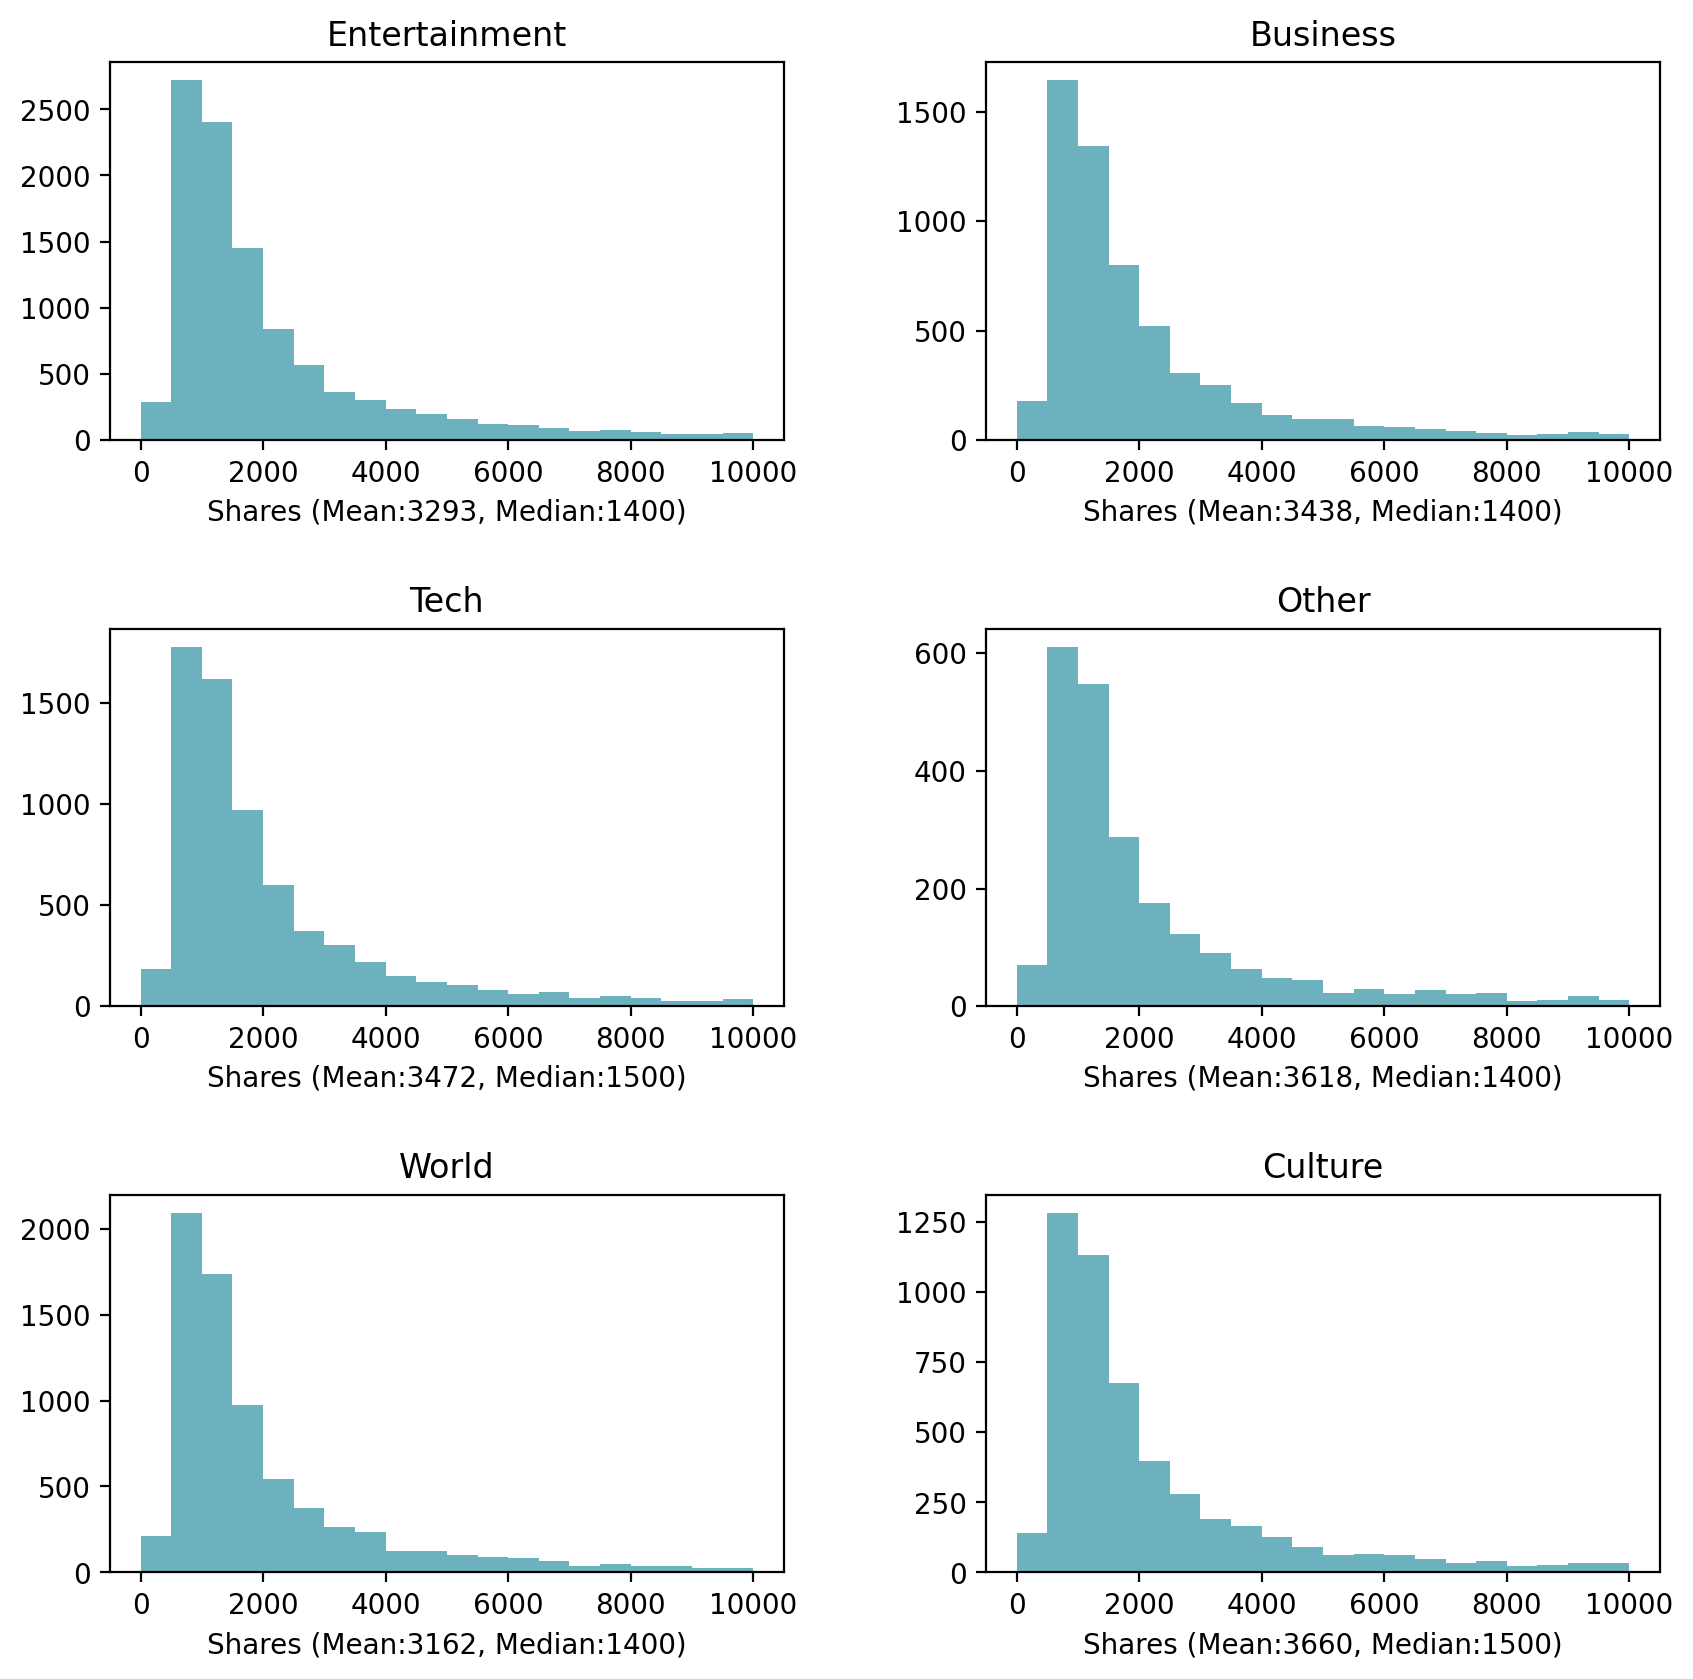

In [7]:
def plot_hist(data,col,x,y,rangemax=None):
    '''
    Plots a histogram for each entry in a specified column
    Allows for a max range to be selected.
    '''
        
    if rangemax == None:
        switch = True
    else:
        switch = False
        
    plt.figure(figsize=(10,10),dpi=200)
    plt.subplots_adjust(hspace=.5,wspace=.3)
    
    for index,entry in enumerate(data[col].unique(),1):
        shares = data[data[col]==entry]["shares"]
        
        if switch == True:
            rangemax=shares.max()
        
        plt.subplot(int(str(y)+str(x)+str(index)))
        plt.hist(shares,bins=20,range=(0,rangemax),color=c1)
        plt.title(str(entry))
        label = ('Shares (Mean:%d, Median:%d)' % (shares.mean(),shares.median()))
        plt.xlabel(label)
        
plot_hist(data,'channel',2,3,rangemax=10000)  

No outstanding differences bewteen data channels it appears

### Weekday

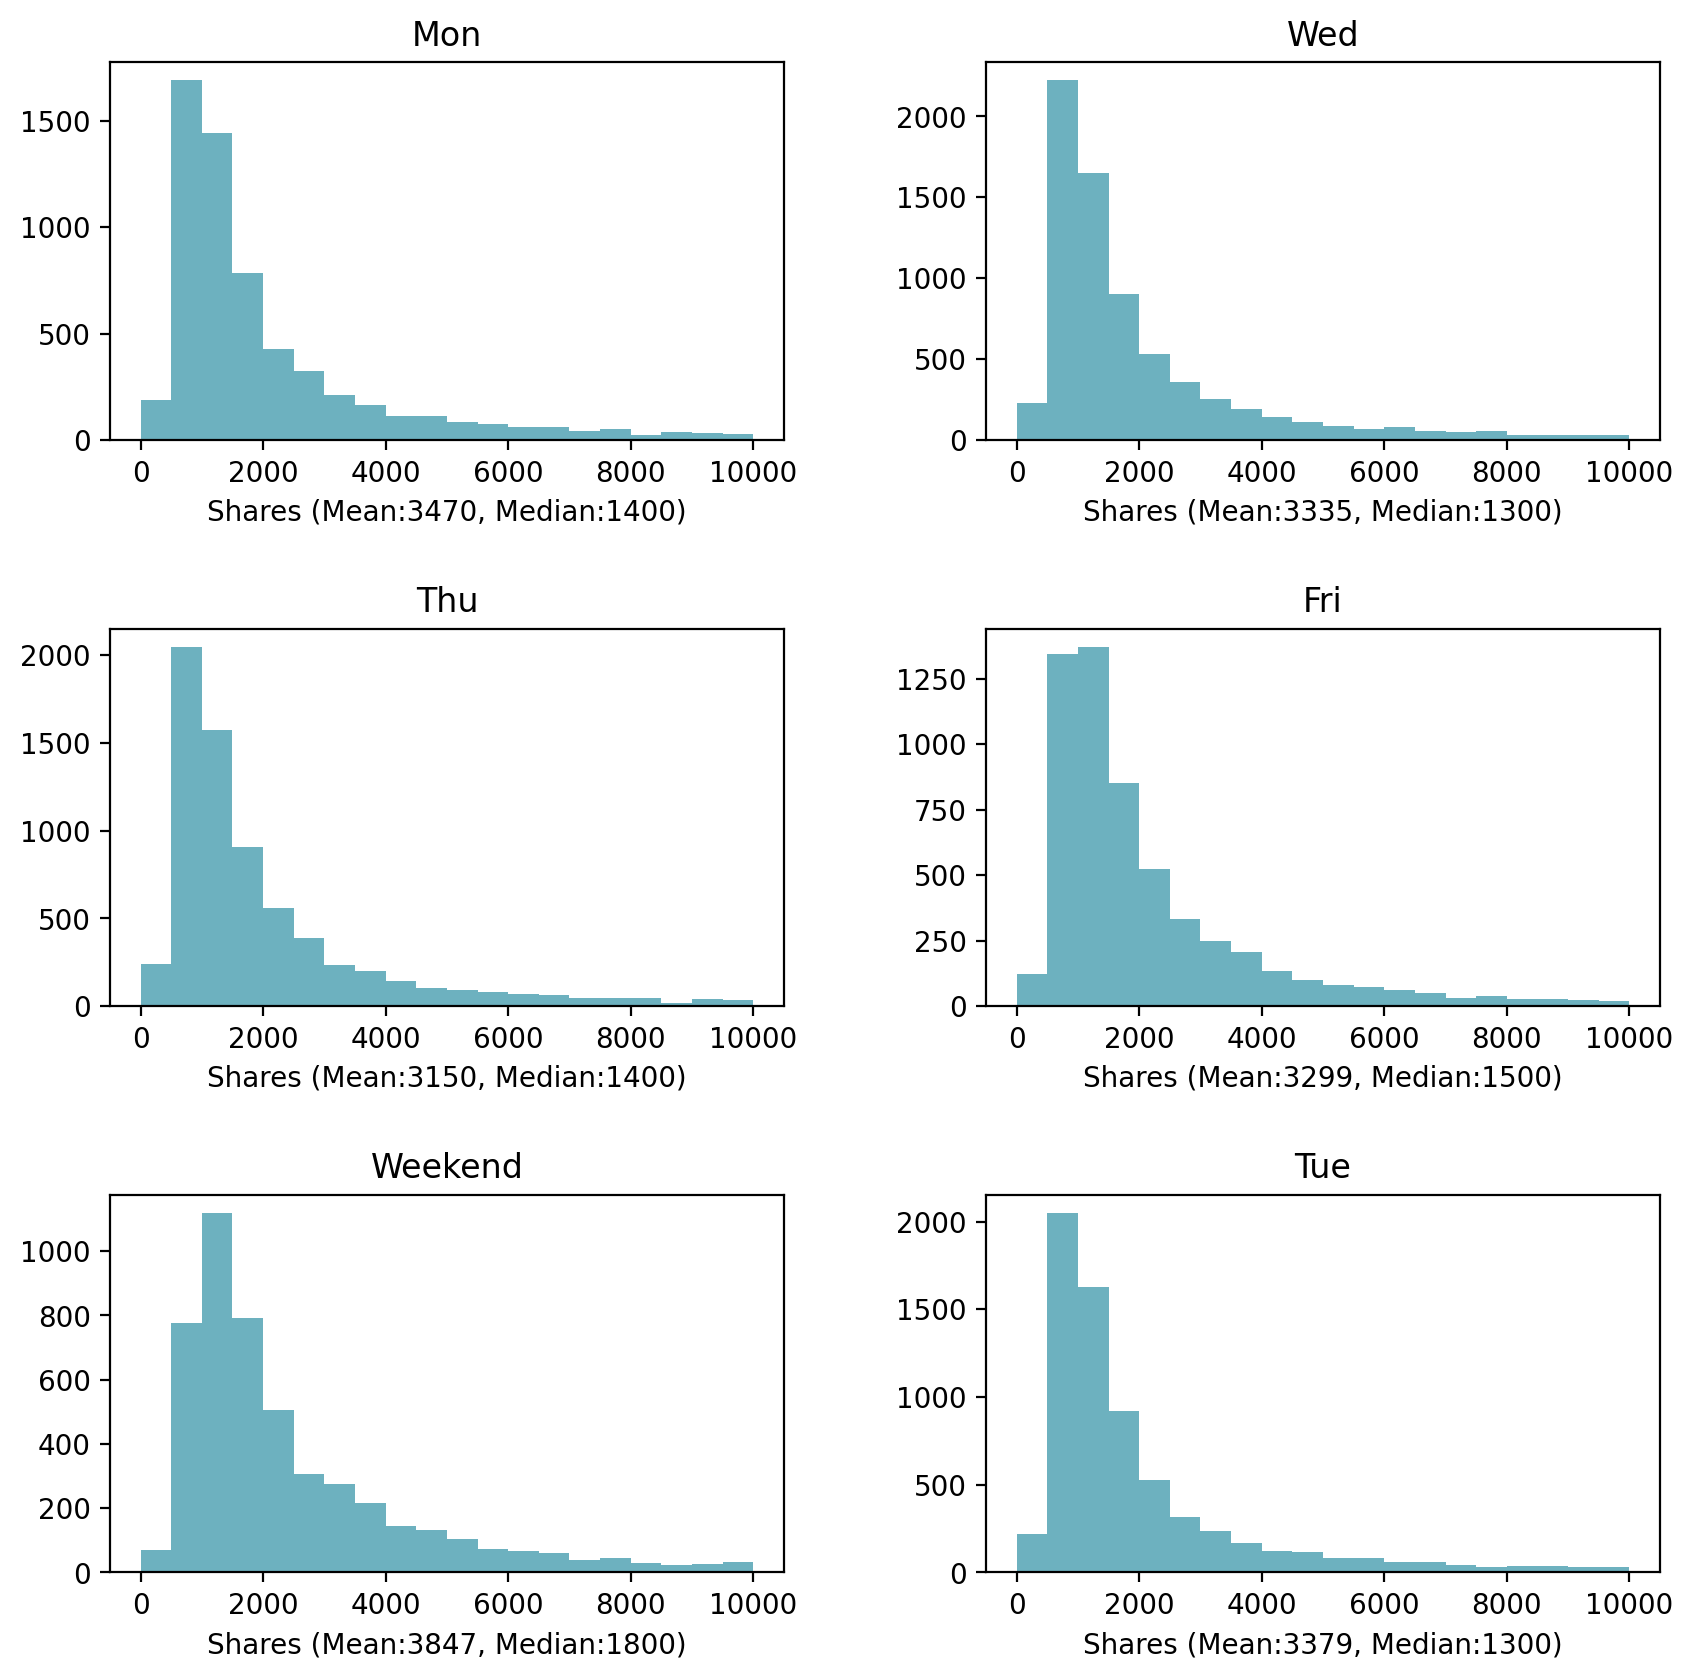

In [8]:
plot_hist(data,'weekday',2,3,rangemax=10000)  

No outstanding diffences in the weekdays either

# Shares with Time
Lets see what Mashable's articles shares look like over the months.

In [9]:
import matplotlib.dates as pltd
from datetime import datetime

def plot_date(data,label=None,ax=None):
    '''
    Plots the shares by dates.
    '''
    if ax==None:
        ax = plt.subplot(111)
    sns.lineplot(data=data, x=data.index,y='shares',marker=None,label=label,color=c1)
    plt.xlim([datetime(2013, 2, 1), datetime(2015, 1, 1)])
    plt.xlabel('Date')
    ax.xaxis.set_minor_locator(pltd.MonthLocator())
    ax.xaxis.set_major_locator(pltd.YearLocator())
    ax.xaxis.set_major_formatter(pltd.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(pltd.DateFormatter('%m'))
    plt.grid(which='both',linestyle=':');
    if label != None:
        plt.legend()
        
# convert the dates to datetime objects
shares_dates = data.reset_index().set_index(pd.DatetimeIndex(data['date'])).drop(columns = 'date')[['shares']]

Text(0.5, 1.0, 'c) Max Article Shares Per Week')

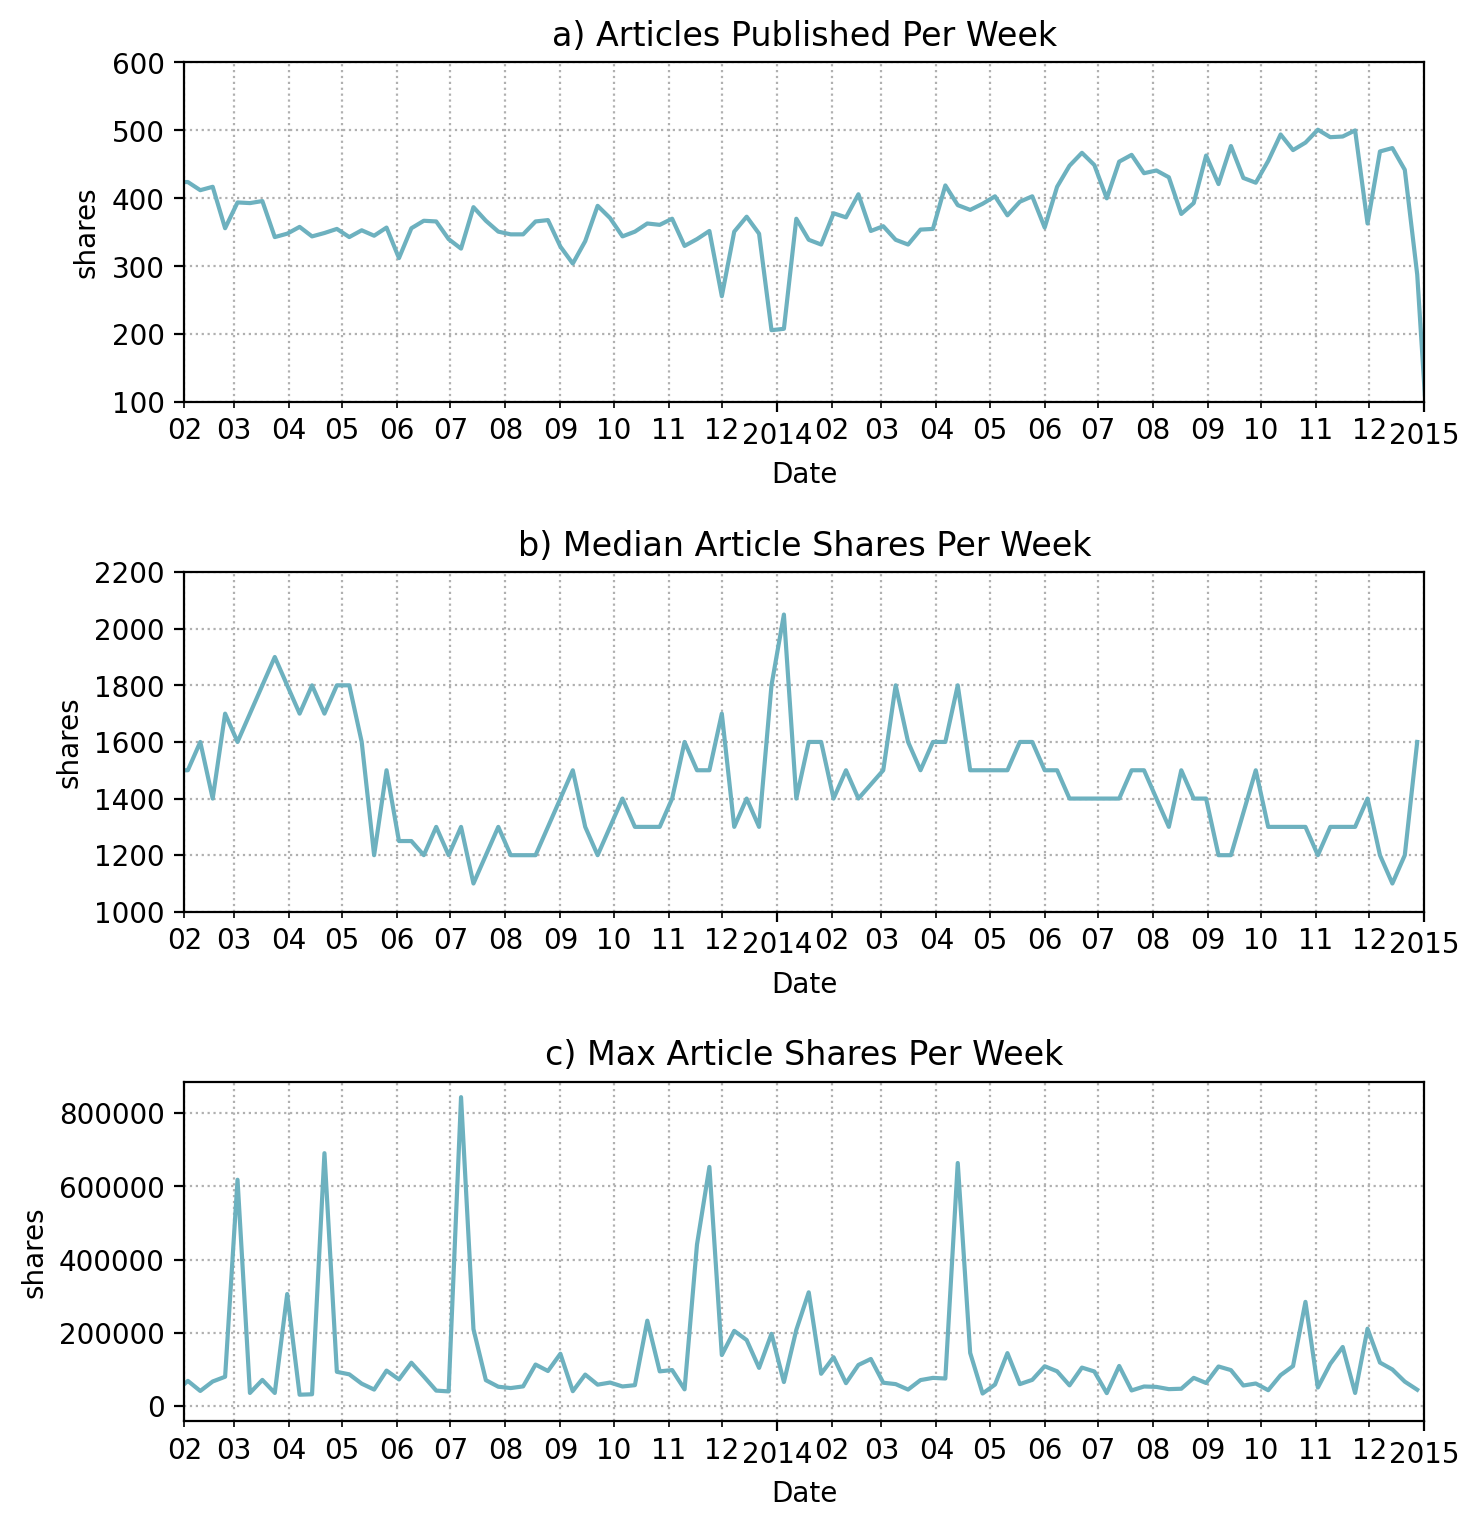

In [10]:
plt.figure(figsize=(8,9),dpi=200)
plt.subplots_adjust(hspace=.5)

# Plot the amount of articles published per month
ax1 = plt.subplot(311)
plot_date(shares_dates.resample('w').count(),ax=ax1)
plt.ylim(100,600)
plt.title("a) Articles Published Per Week")

# Plot the median shares of articles published per month
ax2 = plt.subplot(312)
plot_date(shares_dates.resample('w').median(),ax=ax2)
plt.title("b) Median Article Shares Per Week")
plt.ylim(1000,2200)
    
# Plot the max of article shares per month
ax3 = plt.subplot(313)
plot_date(shares_dates.resample('w').max(),ax=ax3)
plt.title("c) Max Article Shares Per Week")

So it seems that in 2014 mashable started publishing more articles. Despite this, the median shares has fallen by around 200 shares per article. Could there be a difference in the articles that make those published in the past more popular? Or could it be that articles shares grow gradually over the months and newer ones just lack shares due to age?

Another interesting thing is that it appears that weeks where a viral article is published are often followed by a dip in median shares for articles published a week afterwards.

### Viral Articles and Time
Lets take these super high shared articles and compare when they were published to weekly mean

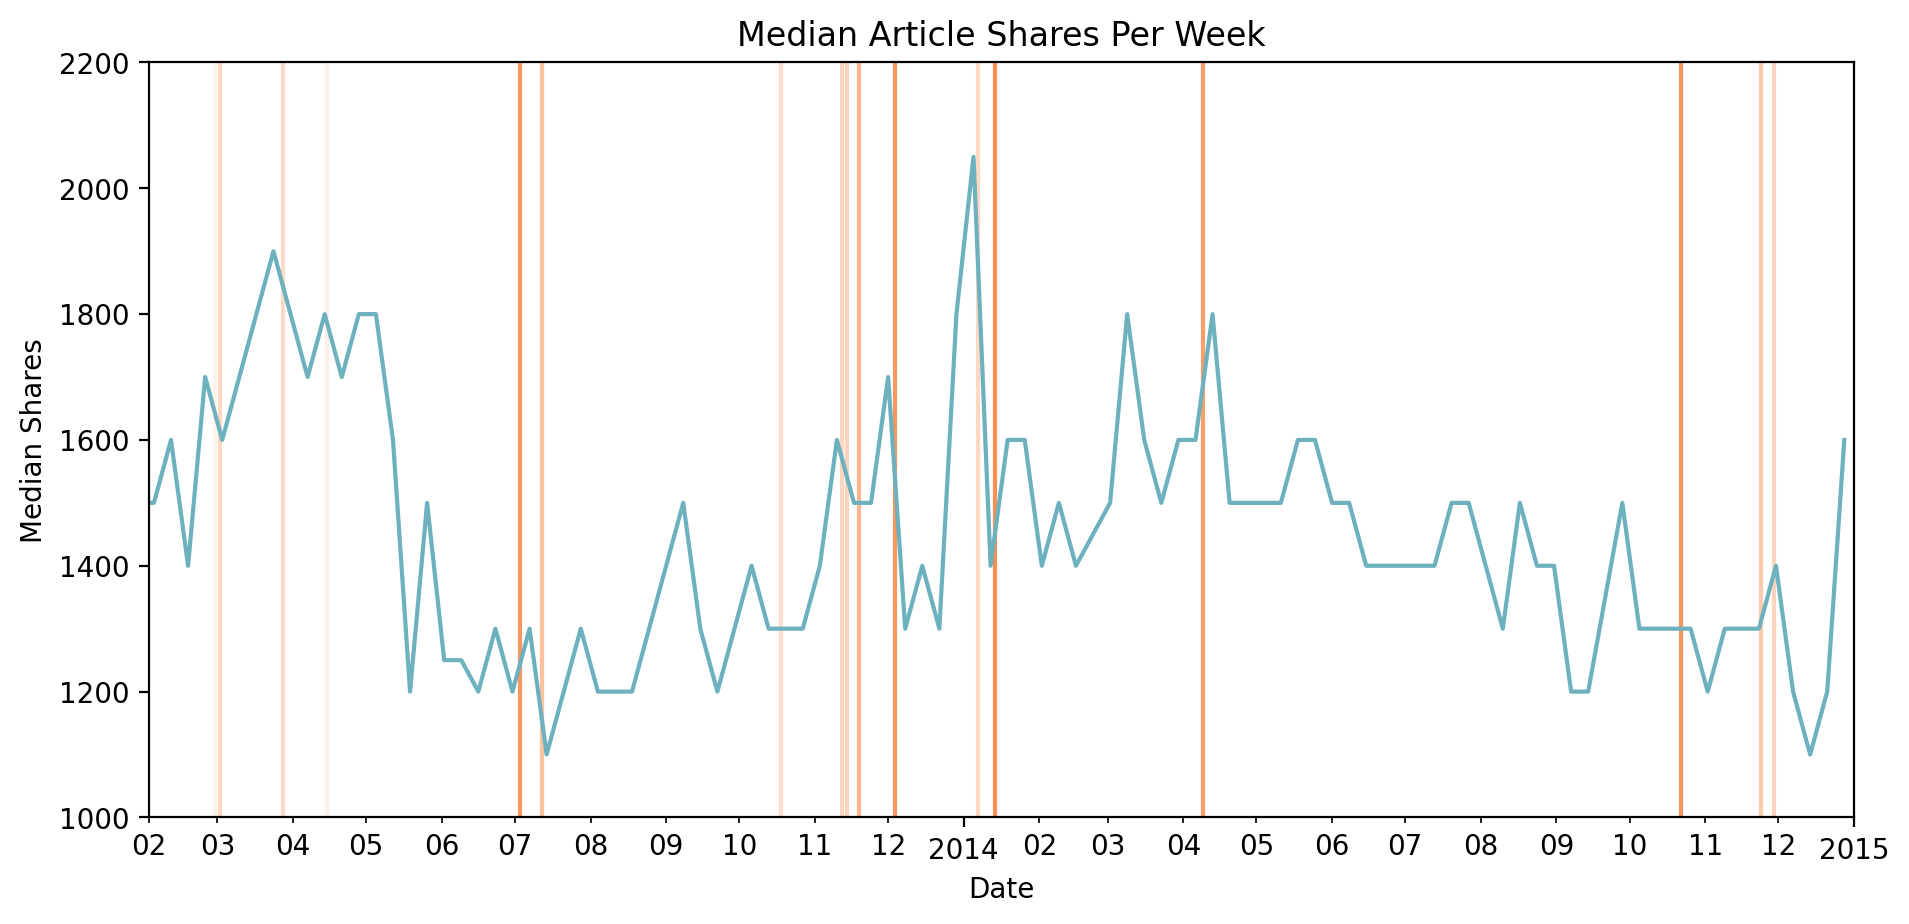

In [11]:
# Viral articles will be those above 200,000 shares

viral_articles = shares_dates.resample('d').max() 
viral_articles = viral_articles[viral_articles.shares > 200000]

# Plot the median shares of articles published per month
plt.figure(figsize=(11,5),dpi=200)

ax = plt.subplot(111)
plt.plot_date(shares_dates.resample('w').median().index,shares_dates.resample('w').median().shares,xdate=True,linestyle='-',marker=None,color=c1)

plt.xlim([datetime(2013, 2, 1), datetime(2015, 1, 1)])
plt.xlabel('Date')
ax.xaxis.set_minor_locator(pltd.MonthLocator())
ax.xaxis.set_major_locator(pltd.YearLocator())
ax.xaxis.set_major_formatter(pltd.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(pltd.DateFormatter('%m'))
plt.title("Median Article Shares Per Week")

ylim_max = 2200
ylim_min = 1000

for article in viral_articles.index:
    y = np.linspace(ylim_min,ylim_max)
    x = [article for var in y]
    plt.plot_date(x,y,xdate=True,linestyle='-',marker=None,c=c3,zorder=-1,alpha=viral_articles.loc[article]['shares'])

plt.ylim(ylim_min,ylim_max)
plt.ylabel('Median Shares');

Seems that viral articles might cause an immediate dip in the median shares, yet a high frequency of these articles occur during areas of a high overall weekly median.

# Keywords
Using the scraped keywords, I tried to refine the origional keyword features so I can see what keywords are preforming well

In [12]:
key_col = data.columns[41:]
keywords = data[key_col]
keywords.describe().astype(int)

,kw_min_min,kw_min_avg,kw_min_max,kw_avg_min,kw_avg_avg,kw_avg_max,kw_max_min,kw_max_avg,kw_max_max
count,39468,39468,39468,39468,39468,39468,39468,39468,39468
mean,400,2441,93429,92,3437,398775,285,4742,339648
std,361,775,177515,211,426,282780,570,4036,297141
min,1,406,446,1,1029,1200,1,1334,3800
25%,54,1835,4500,5,3267,141400,36,3602,64400
50%,390,2587,16250,41,3431,310800,76,3807,196700
75%,629,3140,74100,56,3602,652900,422,4502,652900
max,4500,11650,843300,5800,40771,843300,15000,100459,843300


In [13]:
kw_min = data['kw_min'].value_counts().head()
kw_avg = data['kw_avg'].value_counts().head()
kw_max = data['kw_max'].value_counts().head()

In [14]:
pd.DataFrame({'kw_min':kw_min.index,'kw_avg':kw_avg.index,'kw_max':kw_max.index})

,kw_min,kw_avg,kw_max
0,world,world,gadgets
1,business,entertainment,tech
2,sports,tech,entertainment
3,television,business,u.s.
4,entertainment,culture,viral video


The most common keywords show up alot which makes some sense since there are so many article under these keywords. Interestingly enough, gadets appears to be the most common best preforming keyword.

# The Top
Lets take a closer look at the viral articles

In [15]:
viral_articles = data[data.shares >= 200000]
viral_articles.sort_values('shares',ascending=False).head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,kw_min_avg,kw_min_max,kw_avg,kw_avg_min,kw_avg_avg,kw_avg_max,kw_max,kw_max_min,kw_max_avg,kw_max_max
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,12.0,688.0,0.500734,1.0,0.643357,28.0,3.0,15.0,1.0,4.893895,...,3427,843300,iphone,43,4330,843300,iphone rumors,568,97434,843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,11.0,893.0,0.517202,1.0,0.716730,17.0,11.0,0.0,11.0,4.586786,...,3431,690400,marketing,76,3789,690400,dove,544,49936,690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,13.0,2591.0,0.237708,1.0,0.371091,27.0,4.0,1.0,1.0,4.588962,...,3431,690400,jobs,144,4457,663600,the first 100,642,64524,663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,9.0,134.0,0.689394,1.0,0.851852,1.0,1.0,0.0,2.0,4.082090,...,3267,652900,creativity,596,40771,652900,yeezus,213,66531,652900
http://mashable.com/2013/03/02/wealth-inequality/,11.0,382.0,0.487805,1.0,0.605809,15.0,3.0,11.0,1.0,4.777487,...,3354,617900,videos,5,3666,617900,conversations,36,4365,690400


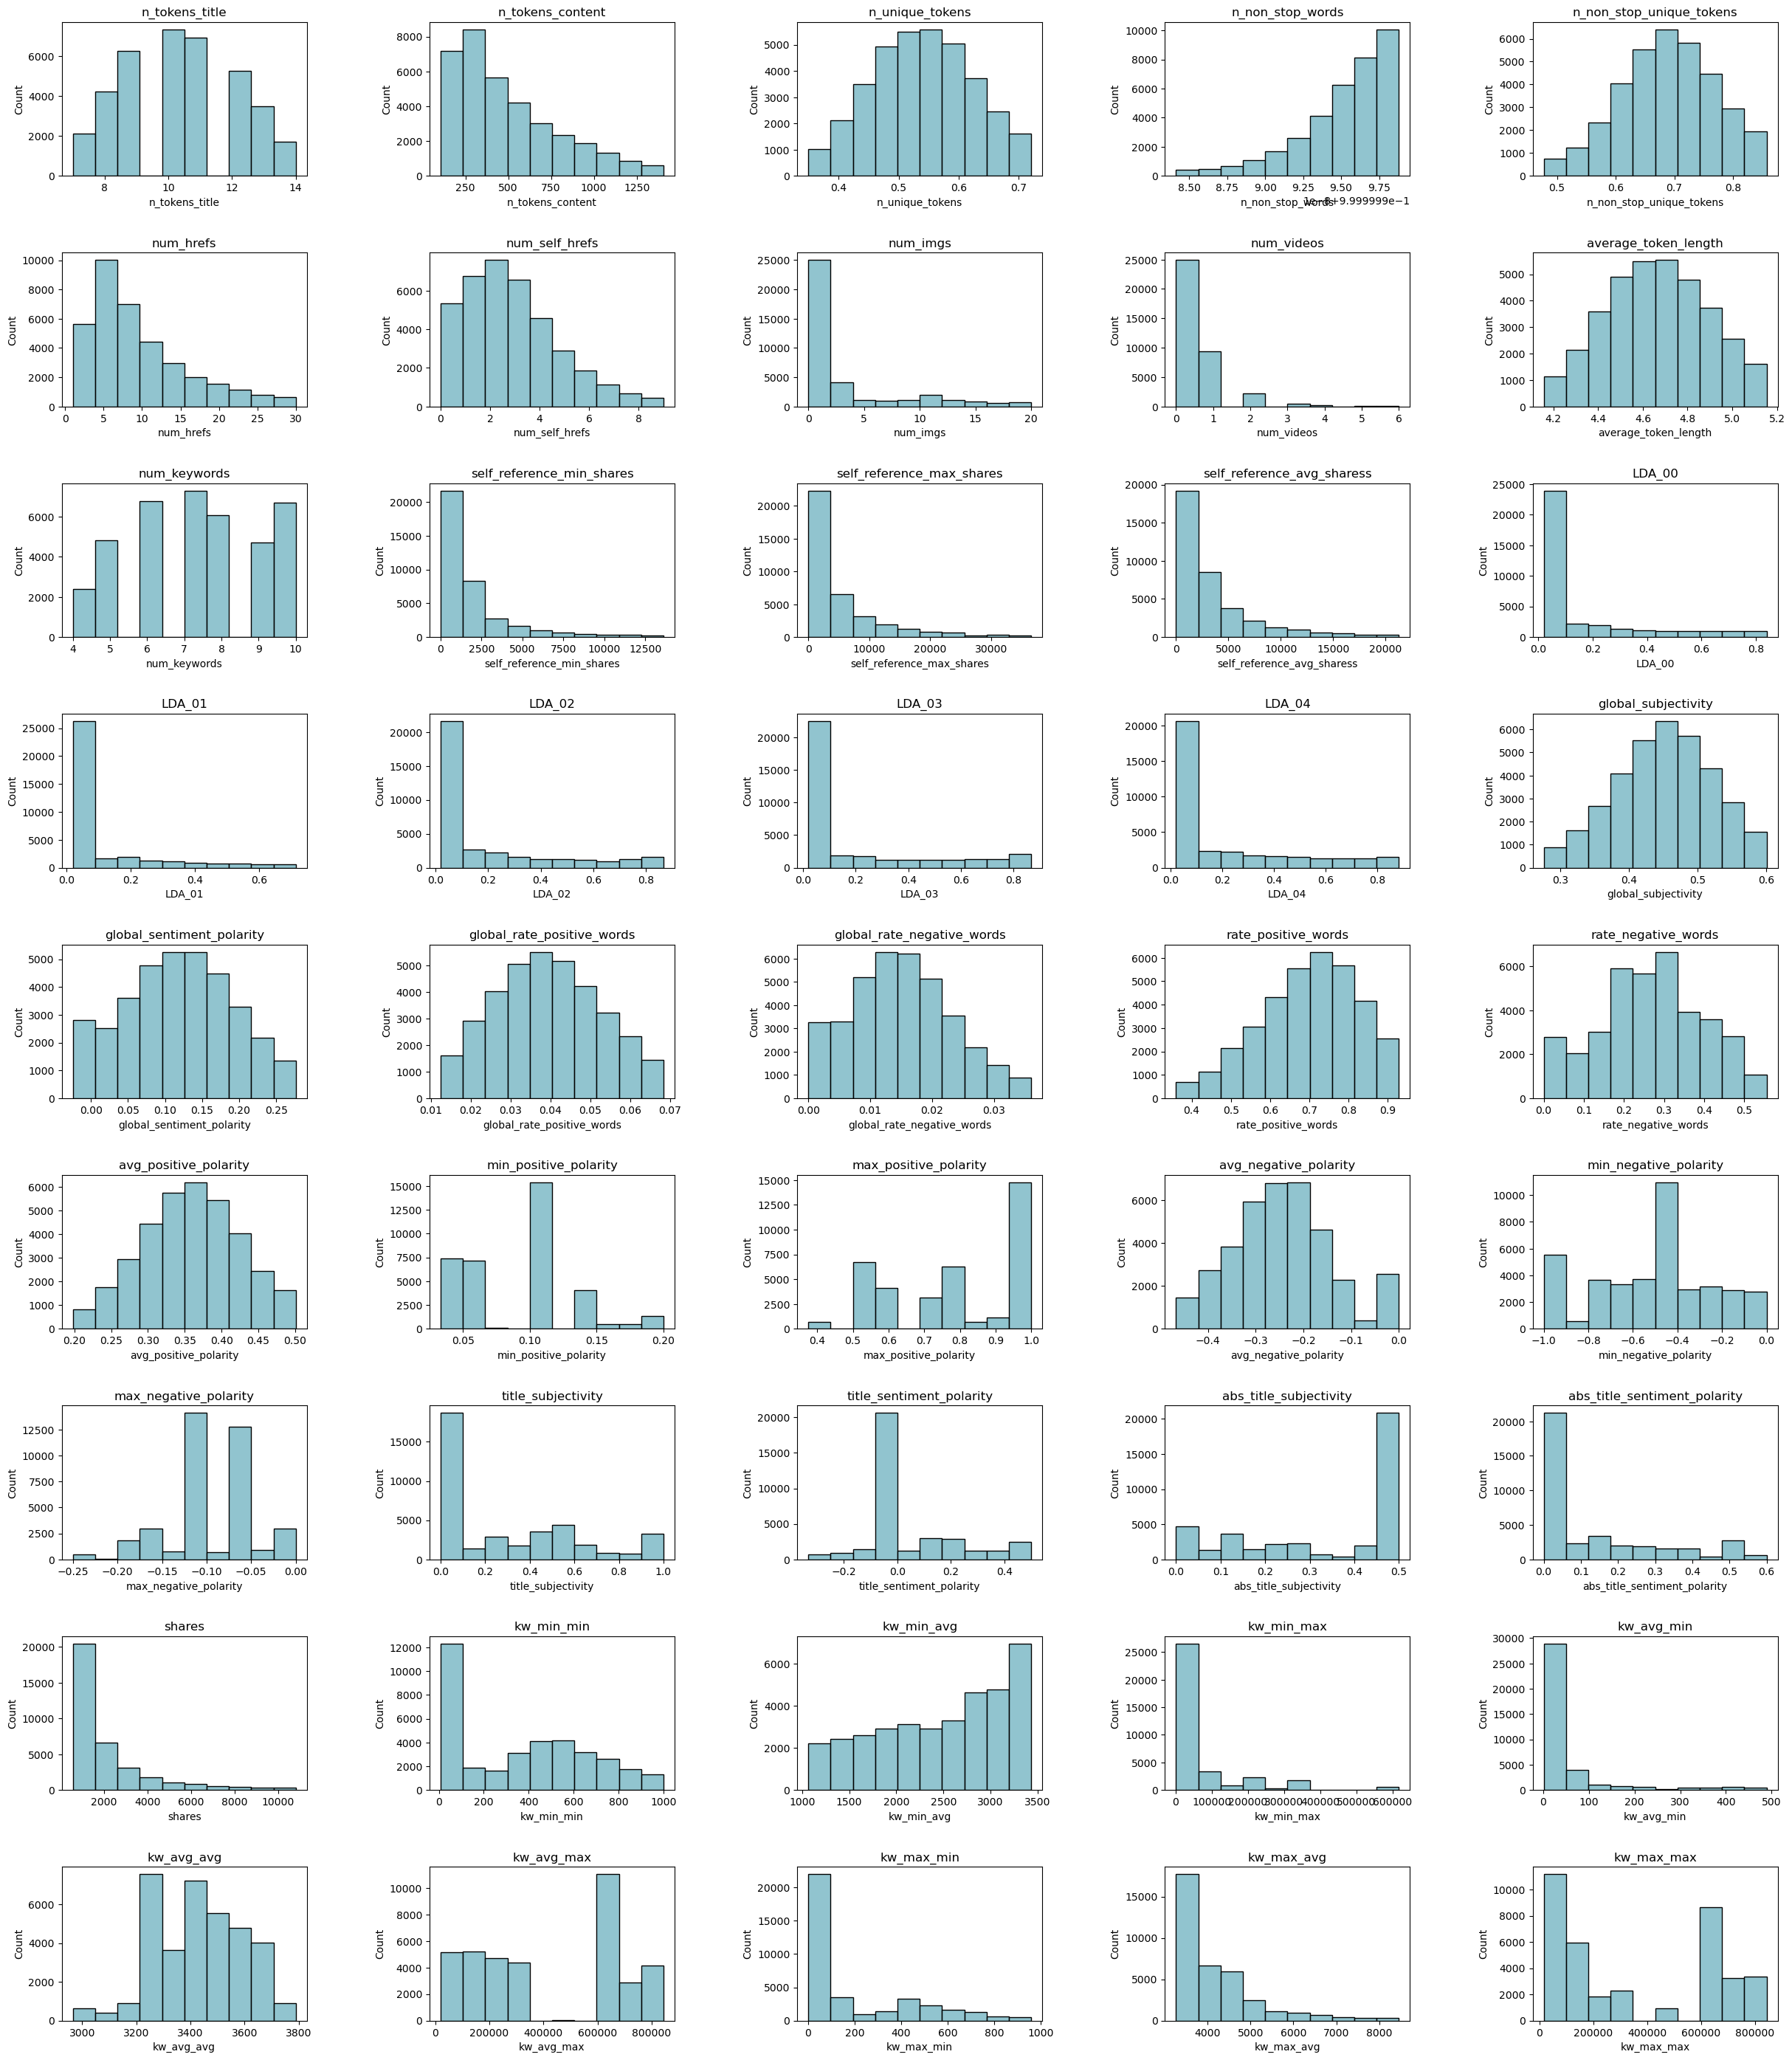

In [16]:
np.seterr(divide='ignore', invalid='ignore')

plt.figure(figsize=(30,40),dpi=100)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

n=1
for col_name in viral_articles.columns:
    if data[col_name].dtypes == int or data[col_name].dtypes == float:
        plt.subplot(10,5,n)
        range_lim = np.percentile(data[col_name],[5,95])
        sns.histplot(data=data,
                     x=col_name,
                     color=c1,
                     bins=10,
                     legend=False,
                     binrange=range_lim)
        plt.title(col_name)
        n+=1

Text(0.5, 1.0, 'Negative Correlation')

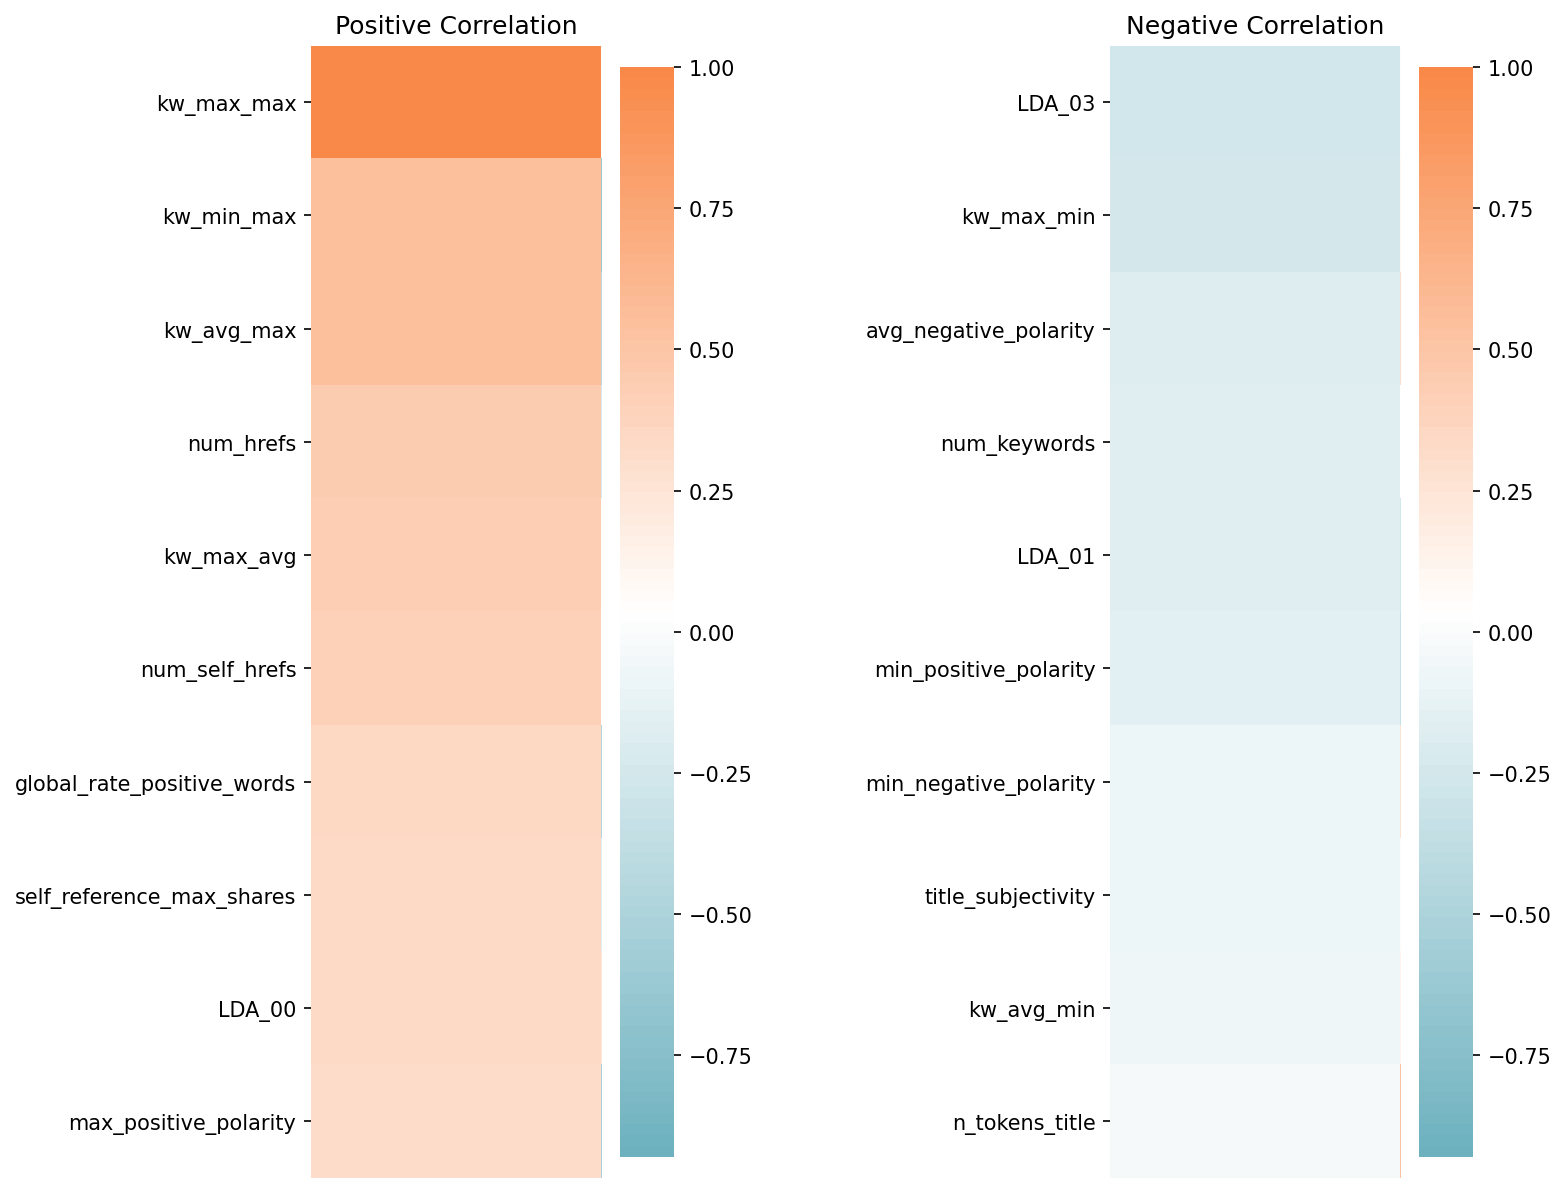

In [17]:
cmap = cplt.LinearSegmentedColormap.from_list("Custom", [c1,'#FFFFFF',c3], N=100)

plt.figure(figsize=(10,10),dpi=150)
plt.subplots_adjust(wspace=1.2)

plt.subplot(121)
sns.heatmap(viral_articles.corr().sort_values('shares',ascending=False),cmap=cmap)
plt.xlim(35,36)
plt.ylim(11,1)
plt.title('Positive Correlation')

plt.subplot(122)
sns.heatmap(viral_articles.corr().sort_values('shares'),cmap=cmap)
plt.xlim(35,36)
plt.ylim(10,0)
plt.title('Negative Correlation')

Seems like the features with the greatest correlation to shares are the kw_max feautres. It also seems subjectivity and positive polarity have a slight negative correlation.

# Save Modeling Data

In [18]:
model_data = pd.get_dummies(data, columns=['channel','weekday'])

# drop the dates, we won't need them for modeling
model_data = model_data.drop(columns=['date','title','kw_max','kw_avg','kw_min'])
model_data.to_csv('OnlineNewsPopularity_ForModeling.csv')

model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39468 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                39468 non-null  float64
 1   n_tokens_content              39468 non-null  float64
 2   n_unique_tokens               39468 non-null  float64
 3   n_non_stop_words              39468 non-null  float64
 4   n_non_stop_unique_tokens      39468 non-null  float64
 5   num_hrefs                     39468 non-null  float64
 6   num_self_hrefs                39468 non-null  float64
 7   num_imgs                      39468 non-null  float64
 8   num_videos                    39468 non-null  float64
 9   average_token_length          39468 non-null  float64
 10  num_keywords                  39468 non-null  float64
 11  self_reference_mi